In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
record_data_list=[]
data_list=np.zeros(7) #[x_1, x_2, x_3,\cdots, x_L]
v_speed=np.zeros_like(data_list)
y=1 # final_target
k=1 # elastic constant
eta=0.01 # time step
noise_epsilon_bar=0.1 # =epsilon/np.sqrt(eta)
old_data_list=data_list.copy()
muright=0.1 # friction when move to right
muleft=0.1 # friction when move to left
        
for step in range(10000):
    new_data_list=np.zeros_like(data_list)
    for i in range(len(data_list)):
        
        if i==0:
            force_right=old_data_list[i+1]-old_data_list[i]
            force_left=old_data_list[i]
            
        elif i==len(data_list)-1:
            force_right=y-old_data_list[i]
            force_left=old_data_list[i]-old_data_list[i-1]
        else:
            force_right=old_data_list[i+1]-old_data_list[i]
            force_left=old_data_list[i]-old_data_list[i-1]
            
        force=(force_right-force_left)*k+np.random.randn()*noise_epsilon_bar

        if force<0: 
            thre=muleft
        else:
            thre=muright
        
        if np.abs(force)<=thre:
            force=0
        else:
            force=force-thre*np.sign(force)

        
        move=force*eta
        new_data_list[i]=old_data_list[i]+move
    record_data_list.append(y-new_data_list)
    old_data_list=new_data_list.copy()

        

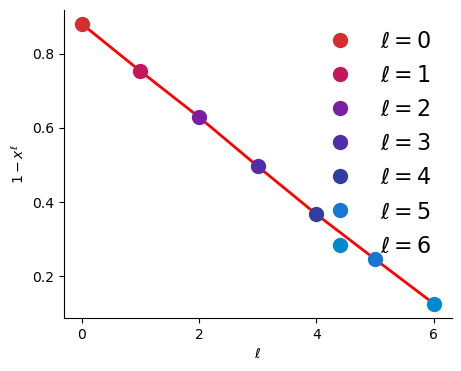

In [3]:
colors = ["#D32F2F", "#C2185B", "#7B1FA2", "#512DA8", "#303F9F", "#1976D2", "#0288D1", "#0097A7", "#00796B", "#388E3C"]
fig, ax = plt.subplots(figsize = (5, 4))
plt.rcParams.update({'font.size': 16})
data=np.array(record_data_list).T
plt.plot(1-new_data_list,color='red',linewidth=2)
for i in range(data.shape[0]):
    plt.plot(i,data[i][-1],'o',label=r'$\ell=$'+str(i),markersize=10,color=colors[i])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$1-x^{\ell}$')
plt.legend(frameon=False)
ax=plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

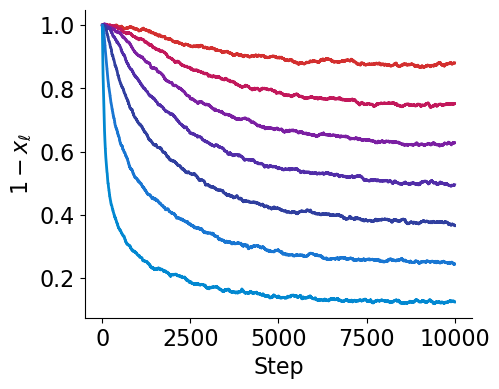

In [5]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (5, 4))
#colors = ["#FF5733", "#FF8D1A", "#FFC300", "#DAF7A6", "#33FF57", "#33FFBD", "#33C4FF", "#3385FF"]
colors = ["#D32F2F", "#C2185B", "#7B1FA2", "#512DA8", "#303F9F", "#1976D2", "#0288D1", "#0097A7", "#00796B", "#388E3C"]


for i in range(data.shape[0]):
    plt.plot(data[i],'-',label=r'$\ell=$'+str(i),linewidth=2,color=colors[i])
plt.xlabel('Step')
plt.ylabel(r'$1-x_{\ell}$')
#plt.legend(frameon=False)
ax=plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
